# CTS Stock Price Predict using ARIMA (6:4)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.statespace.tools import diff
from pmdarima import auto_arima # for determining ARIMA orders
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Đọc dữ liệu từ tệp CSV và đảm bảo rằng cột 'Date' được chuyển đổi đúng cách
df_CTS = pd.read_csv('../Dataset/DataCTS.csv', usecols=['Date', 'Price'], index_col='Date', parse_dates=True, dayfirst=True)

# Đảm bảo rằng index là dạng datetime
df_CTS.index = pd.to_datetime(df_CTS.index, dayfirst=True)

In [3]:
# Kiểm tra kiểu dữ liệu sau khi chuyển đổi
print(df_CTS['Price'].dtype)
print(df_CTS.index)

float64
DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26',
               '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30',
               '2024-05-31', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=1978, freq=None)


In [4]:
df_CTS.dropna(inplace=True)
df_CTS

,Price
Date,
2019-01-02,6504.1
2019-01-03,6385.6
2019-01-04,6240.7
2019-01-05,6240.7
2019-01-06,6240.7
...,...
2024-05-28,43850.0
2024-05-29,42850.0
2024-05-30,43500.0


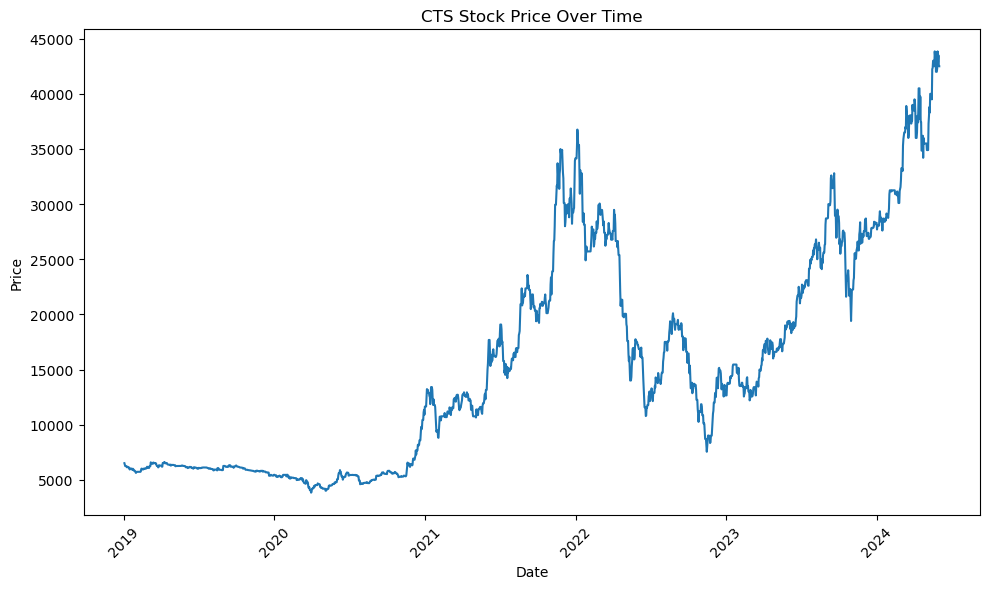

In [5]:
# Plot biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df_CTS['Price'])
plt.title('CTS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Xoay các nhãn trục x để tránh trùng lắp
plt.tight_layout()
plt.show()

Kiểm tra tính dừng của chuỗi thời gian

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
print('-----------CTS---------------')
adf_test(df_CTS['Price'])

-----------CTS---------------
Augmented Dickey-Fuller Test: 
ADF test statistic        -0.070090
p-value                    0.952337
# lags used                4.000000
# observations          1973.000000
critical value (1%)       -3.433669
critical value (5%)       -2.863006
critical value (10%)      -2.567550
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
df_CTS['Price_diff_CTS'] = diff(df_CTS['Price'], k_diff=1)
print('-----------CTS---------------')
adf_test(df_CTS['Price_diff_CTS'])

-----------CTS---------------
Augmented Dickey-Fuller Test: 
ADF test statistic       -19.805365
p-value                    0.000000
# lags used                3.000000
# observations          1973.000000
critical value (1%)       -3.433669
critical value (5%)       -2.863006
critical value (10%)      -2.567550
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Xác định p và q phù hợp với mô hình

In [9]:
print("----------CTS----------")
multiple_models_CTS = auto_arima(df_CTS['Price'],
                             start_P=0, D=None, start_Q=0,  
                             seasonal=True, trace=True, 
                             error_action='ignore', 
                             suppress_warnings=True,
                             stepwise=True,)

----------CTS----------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30210.608, Time=2.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30214.991, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30216.733, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30216.756, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30215.574, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30216.304, Time=1.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30210.779, Time=1.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30210.678, Time=1.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=30217.384, Time=0.98 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30212.775, Time=1.89 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=30214.419, Time=3.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=30210.240, Time=0.68 sec
 ARIMA(

In [10]:
model_CTS = ARIMA(df_CTS['Price'], order=(2,1,2))
model_CTS_fit = model_CTS.fit()
print(model_CTS_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1978
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -15100.120
Date:                Wed, 05 Jun 2024   AIC                          30210.240
Time:                        22:54:04   BIC                          30238.187
Sample:                    01-02-2019   HQIC                         30220.507
                         - 06-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0242      0.109      0.222      0.824      -0.189       0.237
ar.L2          0.7333      0.119      6.170      0.000       0.500       0.966
ma.L1         -0.0109      0.115     -0.095      0.9

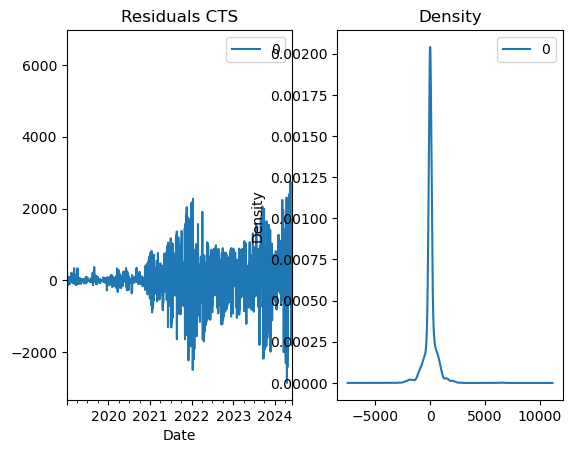

In [11]:
# Plot residual errors
residuals_CTS = pd.DataFrame(model_CTS_fit.resid)
fig, ax = plt.subplots(1,2)
residuals_CTS.plot(title="Residuals CTS", ax=ax[0])
residuals_CTS.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Dự đoán và đánh giá mô hình

In [12]:
print(len(df_CTS))

1978


In [13]:
# Split data 40% for testing, 60% for training
train_size_CTS = int(len(df_CTS) * 0.6)
train_CTS, test_CTS = df_CTS[:train_size_CTS], df_CTS[train_size_CTS:]
print(len(train_CTS), len(test_CTS))

1186 792


In [14]:
n_forecast_CTS = len(test_CTS)
forecast_CTS = model_CTS_fit.predict(start = len(train_CTS))

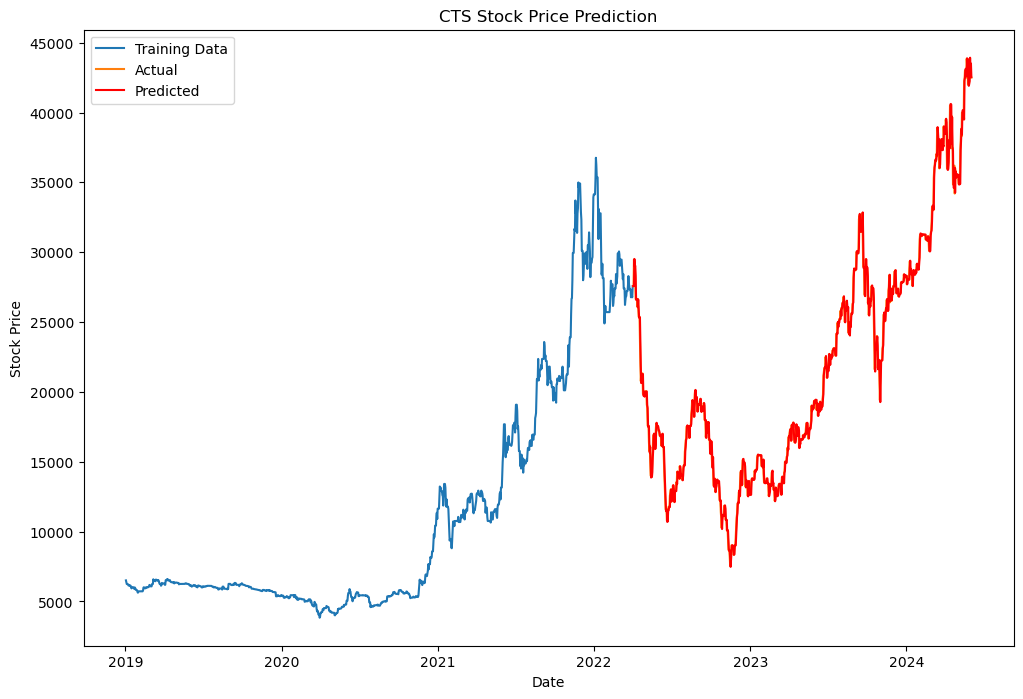

In [15]:
# Biểu đồ cho CTS
plt.figure(figsize=(12,8))  # Thay đổi kích thước của biểu đồ
plt.plot(train_CTS.index, train_CTS['Price'], label='Training Data')
plt.plot(test_CTS.index, test_CTS['Price'], label='Actual')
plt.plot(test_CTS.index, forecast_CTS, label='Predicted', color='red')  # Plot predictions for the test_CTS period
plt.title('CTS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

Đánh giá độ chính xác của mô hình

In [16]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:

# Calculate Mean Absolute Error (MAE) for CTS
print("---------------CTS---------------")
mae_CTS = mean_absolute_error(test_CTS['Price'], forecast_CTS)
print("Mean Absolute Error (MAE) for CTS:", mae_CTS)

# Calculate Mean Squared Error (MSE) for CTS
mse_CTS = mean_squared_error(test_CTS['Price'], forecast_CTS)
print("Mean Squared Error (MSE) for CTS:", mse_CTS)

# Calculate Mean Absolute Percentage Error (MAPE) for CTS
mape_CTS = mean_absolute_percentage_error(test_CTS['Price'], forecast_CTS)

print("Mean Absolute Percentage Error (MAPE) for CTS:", mape_CTS)
print("Root Mean Squared Error (RMSE) for CTS:", root_mean_squared_error(test_CTS['Price'], forecast_CTS))


---------------CTS---------------
Mean Absolute Error (MAE) for CTS: 397.69131105304234
Mean Squared Error (MSE) for CTS: 389843.4785949054
Mean Absolute Percentage Error (MAPE) for CTS: 1.96983199783506
Root Mean Squared Error (RMSE) for CTS: 624.374469845545


Dự đoán cho 30, 60, 90 ngày tiếp theo và vẽ biểu đồ

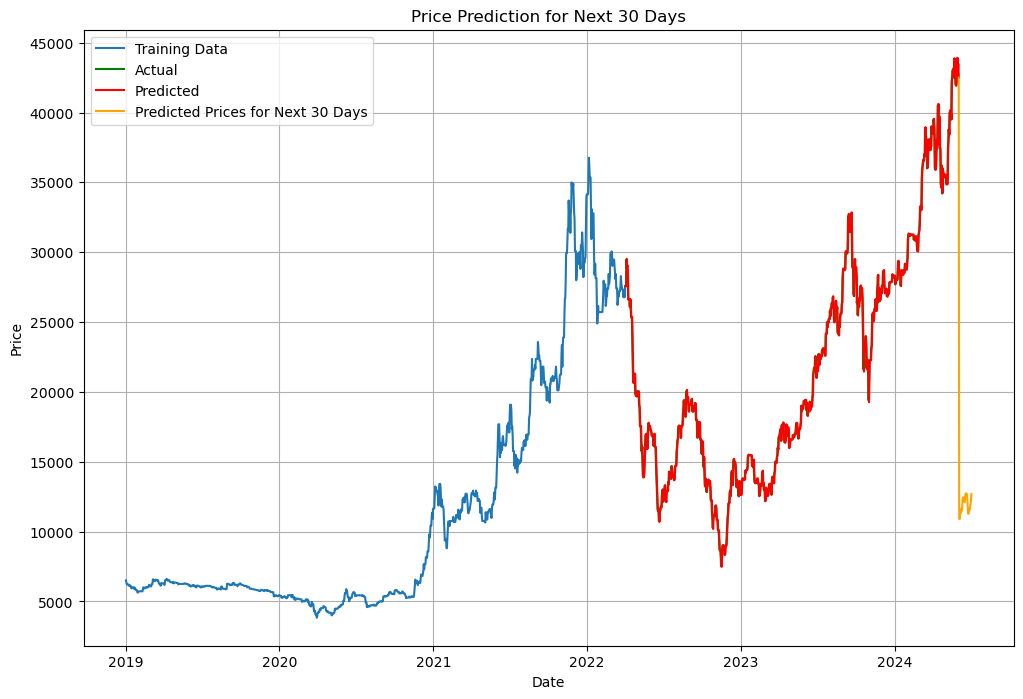

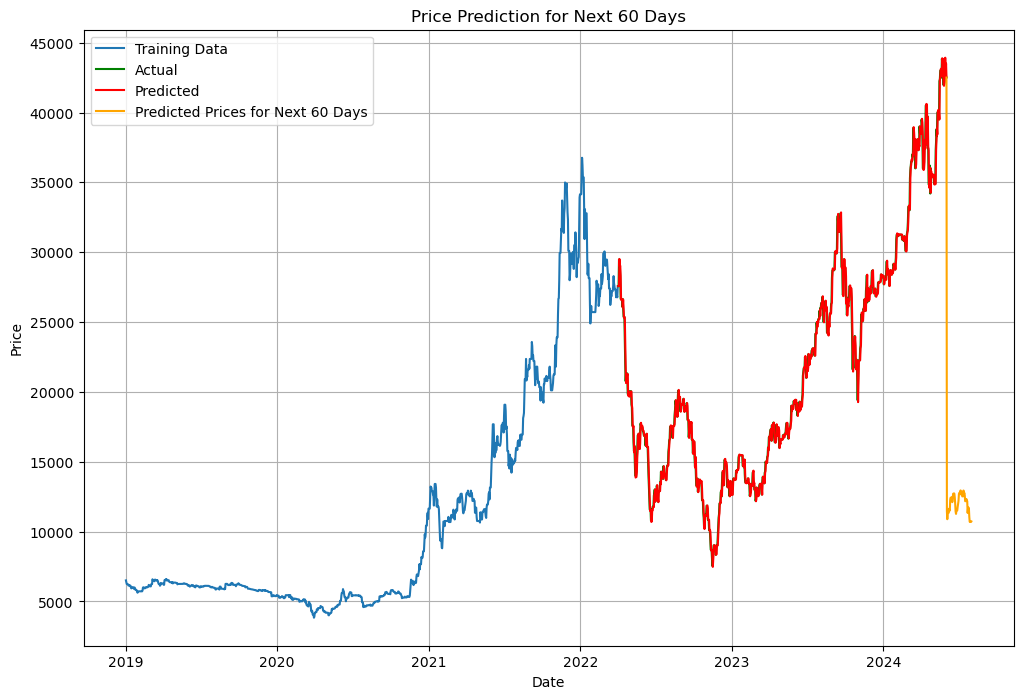

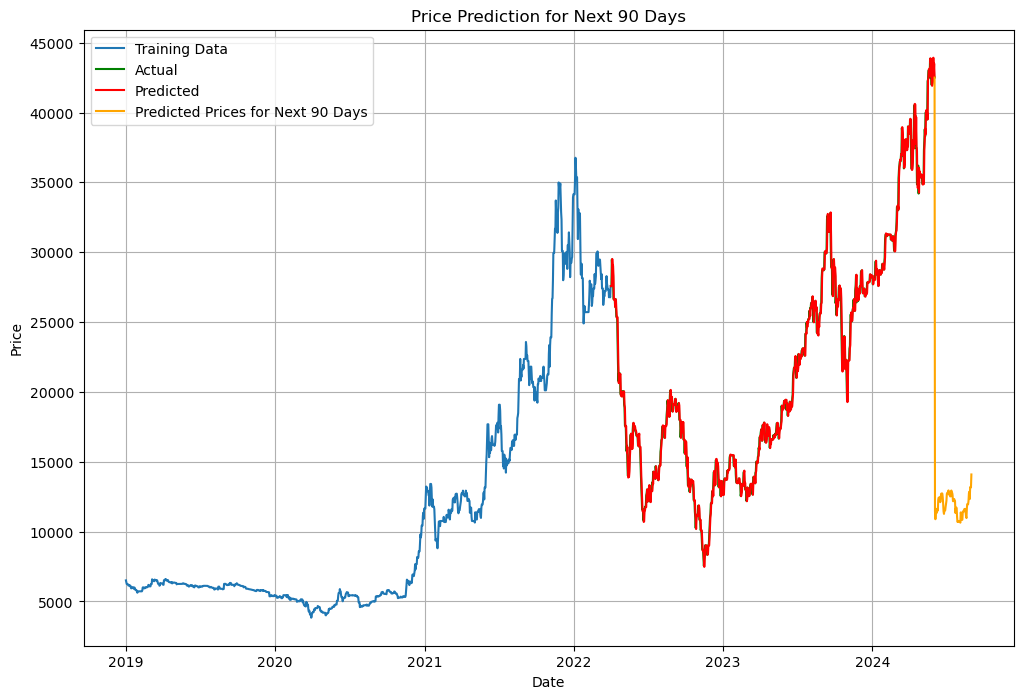

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def forecast_and_plot(days, train_data, test_data, model_fit):
    # Tạo một mảng ngày mới cho số ngày tiếp theo
    date_range = pd.date_range(start=test_data.index[-1], periods=days + 1)  # Bao gồm cả ngày cuối cùng của test_data

    # Dự đoán cho số ngày tiếp theo
    forecast = model_fit.predict(start=len(test_data), end=len(test_data) + days - 1)

    # Tạo DataFrame cho dự đoán, bao gồm cả ngày cuối cùng của test_data
    forecast_df = pd.DataFrame({'Date': date_range[1:], 'Predicted': forecast})

    # Thêm ngày cuối cùng của test_data vào ngày đầu tiên của forecast
    forecast_df = pd.concat([pd.DataFrame({'Date': [test_data.index[-1]], 'Predicted': [test_data['Price'].iloc[-1]]}), forecast_df])

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    plt.plot(train_data.index, train_data['Price'], label='Training Data')
    plt.plot(test_data.index, test_data['Price'], label='Actual', color = 'green')
    plt.plot(test_CTS.index, forecast_CTS, label='Predicted', color='red')
    plt.plot(forecast_df['Date'], forecast_df['Predicted'], label=f'Predicted Prices for Next {days} Days', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Prediction for Next {days} Days')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ví dụ với dữ liệu train_CTS, test_CTS và model_CTS_fit
forecast_and_plot(30, train_CTS, test_CTS, model_CTS_fit)
forecast_and_plot(60, train_CTS, test_CTS, model_CTS_fit)
forecast_and_plot(90, train_CTS, test_CTS, model_CTS_fit)


# SBS Stock Price Predict using ARIMA (6:4)

In [19]:
# Đọc dữ liệu từ tệp CSV và đảm bảo rằng cột 'Date' được chuyển đổi đúng cách
df_SBS = pd.read_csv('../Dataset/DataSBS.csv', usecols=['Date', 'Price'], index_col='Date', parse_dates=True, dayfirst=True)

# Đảm bảo rằng index là dạng datetime
df_SBS.index = pd.to_datetime(df_SBS.index, dayfirst=True)

In [20]:
# Kiểm tra kiểu dữ liệu sau khi chuyển đổi
print(df_SBS['Price'].dtype)
print(df_SBS.index)

int64
DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26',
               '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30',
               '2024-05-31', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=1978, freq=None)


In [21]:
df_SBS.dropna(inplace=True)
print(df_SBS)

            Price
Date             
2019-01-02   1700
2019-01-03   1600
2019-01-04   1600
2019-01-05   1600
2019-01-06   1600
...           ...
2024-05-28   6900
2024-05-29   6900
2024-05-30   6800
2024-05-31   6800
2024-06-01   6800

[1978 rows x 1 columns]


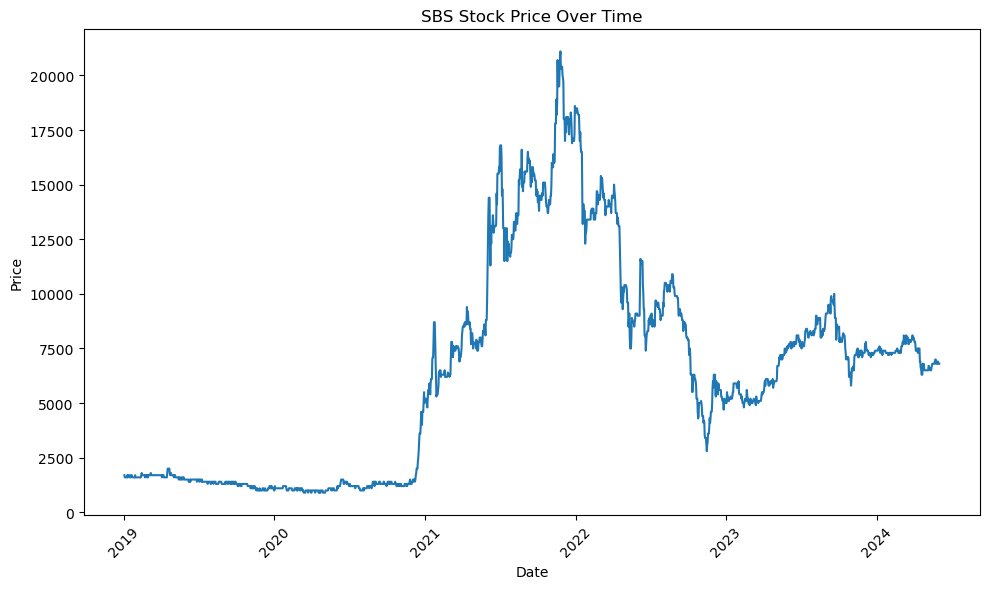

In [22]:
# Plot biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df_SBS.index, df_SBS['Price'])
plt.title('SBS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Xoay các nhãn trục x để tránh trùng lắp
plt.tight_layout()
plt.show()

Kiểm tra tính dừng của chuỗi thời gian

In [23]:
print('-----------SBS---------------')
adf_test(df_SBS['Price'])

-----------SBS---------------
Augmented Dickey-Fuller Test: 
ADF test statistic        -1.558293
p-value                    0.504503
# lags used               20.000000
# observations          1957.000000
critical value (1%)       -3.433696
critical value (5%)       -2.863018
critical value (10%)      -2.567557
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [24]:
df_SBS['Price_diff_SBS'] = diff(df_SBS['Price'], k_diff=1)
print('-----------SBS---------------')
adf_test(df_SBS['Price_diff_SBS'])

-----------SBS---------------
Augmented Dickey-Fuller Test: 
ADF test statistic     -9.661218e+00
p-value                 1.351919e-16
# lags used             1.900000e+01
# observations          1.957000e+03
critical value (1%)    -3.433696e+00
critical value (5%)    -2.863018e+00
critical value (10%)   -2.567557e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [25]:
print("----------SBS----------")
multiple_models_SBS = auto_arima(df_SBS['Price'],
                             start_P=0, D=None, start_Q=0,  
                             seasonal=True, trace=True, 
                             error_action='ignore', 
                             suppress_warnings=True,
                             stepwise=True,)

----------SBS----------
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27850.472, Time=2.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27874.958, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27876.558, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27876.587, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27873.128, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27869.164, Time=1.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27870.781, Time=1.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27860.976, Time=0.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=27861.400, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27878.431, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27859.422, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27859.773, Time=0.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=27862.617, Time=3.09 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=27848.299, Time=1.44

In [26]:
model_SBS = ARIMA(df_SBS['Price'], order=(2,1,2))
model_SBS_fit = model_SBS.fit()
print(model_SBS_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1978
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13919.150
Date:                Wed, 05 Jun 2024   AIC                          27848.299
Time:                        22:54:25   BIC                          27876.246
Sample:                    01-02-2019   HQIC                         27858.567
                         - 06-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5203      0.015    100.146      0.000       1.491       1.550
ar.L2         -0.9211      0.014    -63.922      0.000      -0.949      -0.893
ma.L1         -1.5157      0.012   -123.518      0.0

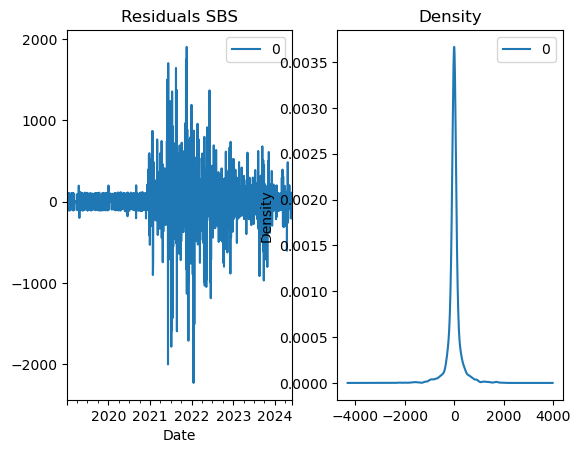

In [27]:
# Plot residual errors
residuals_SBS = pd.DataFrame(model_SBS_fit.resid)
fig, ax = plt.subplots(1,2)
residuals_SBS.plot(title="Residuals SBS", ax=ax[0])
residuals_SBS.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Dự đoán và đánh giá mô hình

In [28]:
print(len(df_SBS))

1978


In [29]:
# Split data 40% for testing, 60% for training
train_size_SBS = int(len(df_SBS) * 0.6)
train_SBS, test_SBS = df_SBS[:train_size_SBS], df_SBS[train_size_SBS:]
print(len(train_SBS), len(test_SBS))

1186 792


In [30]:
n_forecast_SBS = len(test_SBS)
forecast_SBS = model_SBS_fit.predict(start = len(train_SBS))

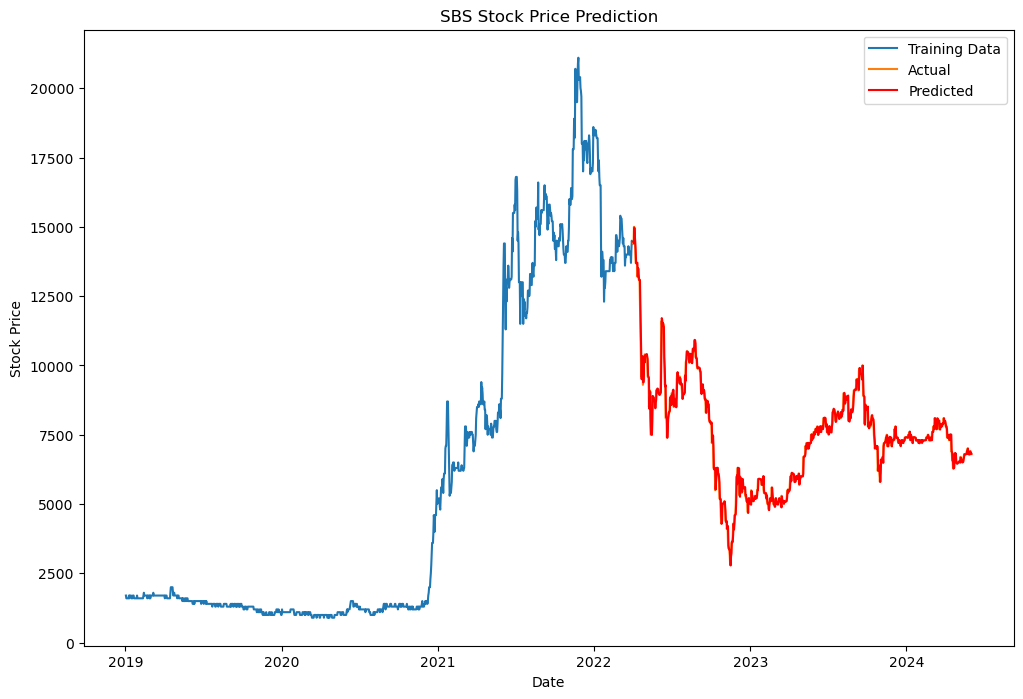

In [31]:
# Biểu đồ cho CTS
plt.figure(figsize=(12,8))  # Thay đổi kích thước của biểu đồ
plt.plot(train_SBS.index, train_SBS['Price'], label='Training Data')
plt.plot(test_SBS.index, test_SBS['Price'], label='Actual')
plt.plot(test_SBS.index, forecast_SBS, label='Predicted', color='red')  # Plot predictions for the test_SBS period
plt.title('SBS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

Đánh giá độ chính xác của mô hình

In [32]:

# Calculate Mean Absolute Error (MAE) for SBS
print("---------------SBS---------------")
mae_SBS = mean_absolute_error(test_SBS['Price'], forecast_SBS)
print("Mean Absolute Error (MAE) for SBS:", mae_SBS)

# Calculate Mean Squared Error (MSE) for SBS
mse_SBS = mean_squared_error(test_SBS['Price'], forecast_SBS)
print("Mean Squared Error (MSE) for SBS:", mse_SBS)

# Calculate Mean Absolute Percentage Error (MAPE) for SBS
mape_SBS = mean_absolute_percentage_error(test_SBS['Price'], forecast_SBS)

print("Mean Absolute Percentage Error (MAPE) for SBS:", mape_SBS)
print("Root Mean Squared Error (RMSE) for SBS:", root_mean_squared_error(test_SBS['Price'], forecast_SBS))


---------------SBS---------------
Mean Absolute Error (MAE) for SBS: 142.21647990178914
Mean Squared Error (MSE) for SBS: 58109.02592478401
Mean Absolute Percentage Error (MAPE) for SBS: 1.967859182351872
Root Mean Squared Error (RMSE) for SBS: 241.05813805964735


Dự đoán cho 30, 60, 90 ngày tiếp theo và vẽ biểu đồ

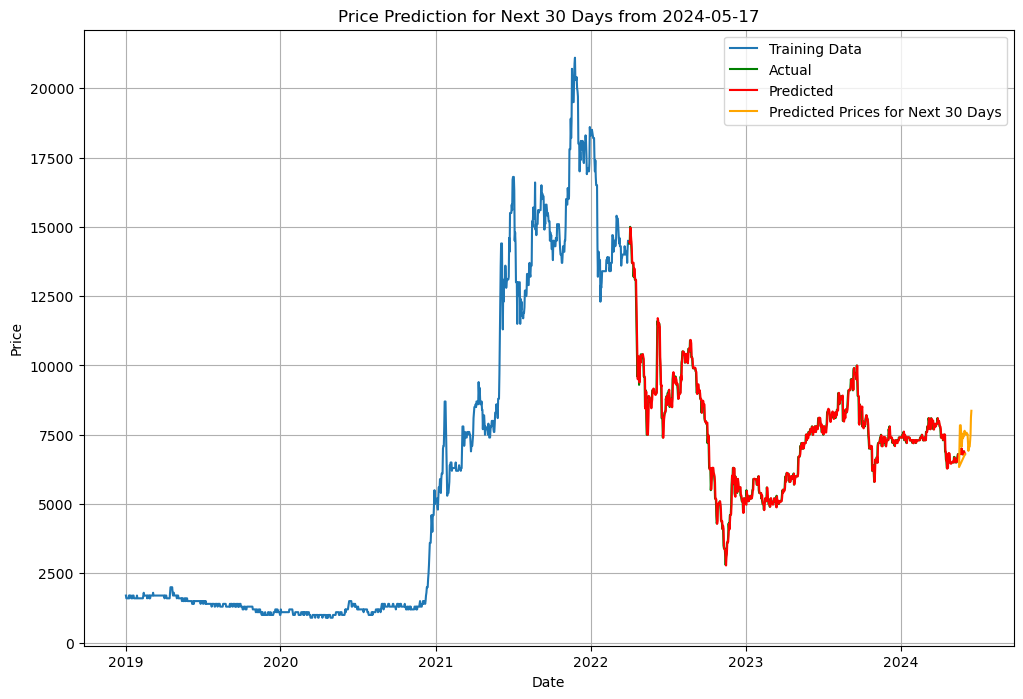

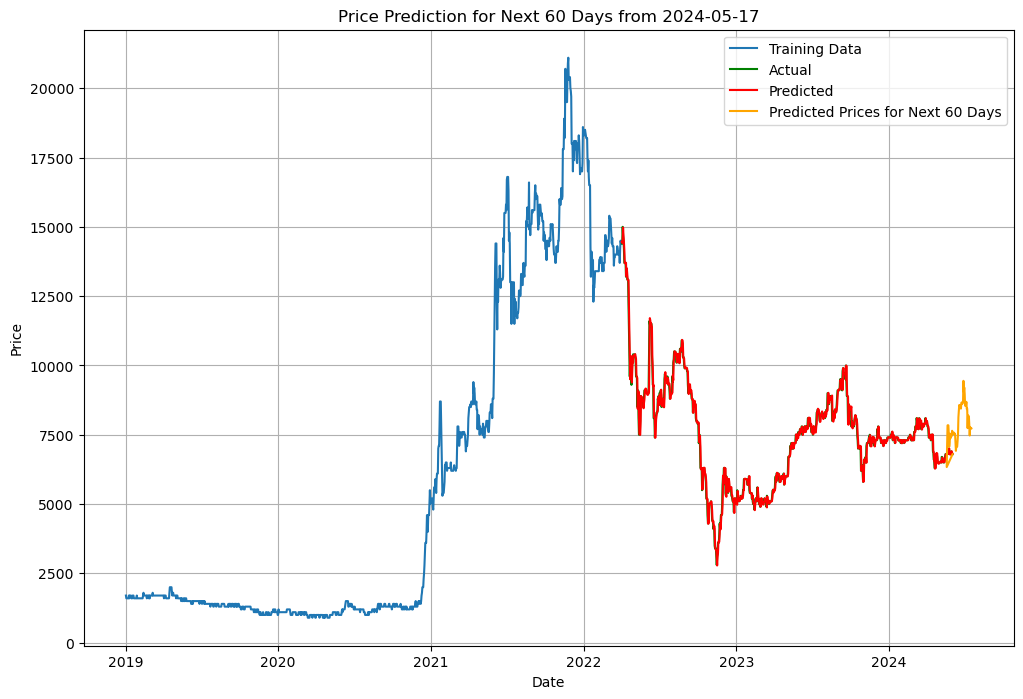

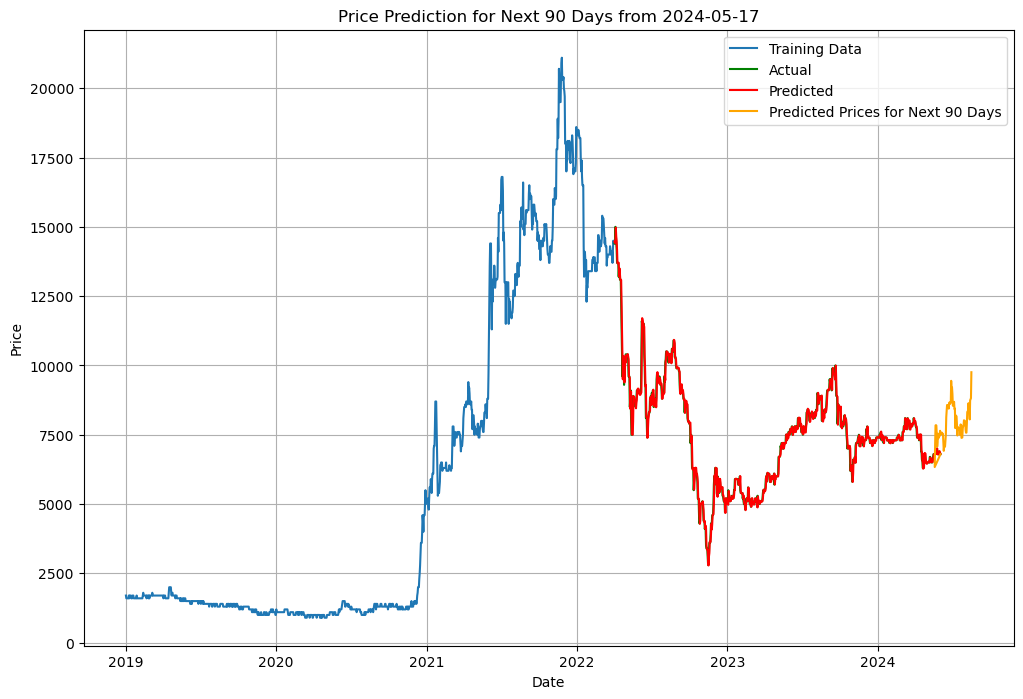

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def forecast_and_plot(start_date, days, train_data, test_data, model_fit):
    # Tạo một mảng ngày mới cho số ngày tiếp theo kể từ start_date
    date_range = pd.date_range(start=start_date, periods=days + 1)  # Bao gồm cả ngày bắt đầu dự đoán

    # Dự đoán cho số ngày tiếp theo
    forecast = model_fit.predict(start=len(test_data), end=len(test_data) + days - 1)

    # Tạo DataFrame cho dự đoán
    forecast_df = pd.DataFrame({'Date': date_range[1:], 'Predicted': forecast.values})

# Thêm ngày cuối cùng của test_data vào ngày đầu tiên của forecast
    forecast_df = pd.concat([pd.DataFrame({'Date': [test_data.index[-1]], 'Predicted': [test_data['Price'].iloc[-1]]}), forecast_df])

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    plt.plot(train_data.index, train_data['Price'], label='Training Data')
    plt.plot(test_data.index, test_data['Price'], label='Actual', color='green')
    plt.plot(test_data.index, forecast_SBS, label='Predicted', color='red')
    plt.plot(forecast_df['Date'], forecast_df['Predicted'], label=f'Predicted Prices for Next {days} Days', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Prediction for Next {days} Days from {start_date.date()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Ví dụ với dữ liệu train_SBS, test_SBS và model_SBS_fit
forecast_and_plot(start_date, 30, train_SBS, test_SBS, model_SBS_fit)
forecast_and_plot(start_date, 60, train_SBS, test_SBS, model_SBS_fit)
forecast_and_plot(start_date, 90, train_SBS, test_SBS, model_SBS_fit)


# ACB Stock Price Predict using ARIMA (6:4)

In [34]:
# Đọc dữ liệu từ tệp CSV và đảm bảo rằng cột 'Date' được chuyển đổi đúng cách
df_ACB = pd.read_csv('../Dataset/DataACB.csv', usecols=['Date', 'Price'], index_col='Date', parse_dates=True, dayfirst=True)

# Đảm bảo rằng index là dạng datetime
df_ACB.index = pd.to_datetime(df_ACB.index, dayfirst=True)

In [35]:
# Kiểm tra kiểu dữ liệu sau khi chuyển đổi
print(df_ACB['Price'].dtype)
print(df_ACB.index)

float64
DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26',
               '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30',
               '2024-05-31', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=1978, freq=None)


In [36]:
df_ACB.dropna(inplace=True)
print(df_ACB)

              Price
Date               
2019-01-02  11058.0
2019-01-03  10641.4
2019-01-04  10717.2
2019-01-05  10717.2
2019-01-06  10717.2
...             ...
2024-05-28  29650.0
2024-05-29  29250.0
2024-05-30  25565.0
2024-05-31  24650.0
2024-06-01  24650.0

[1978 rows x 1 columns]


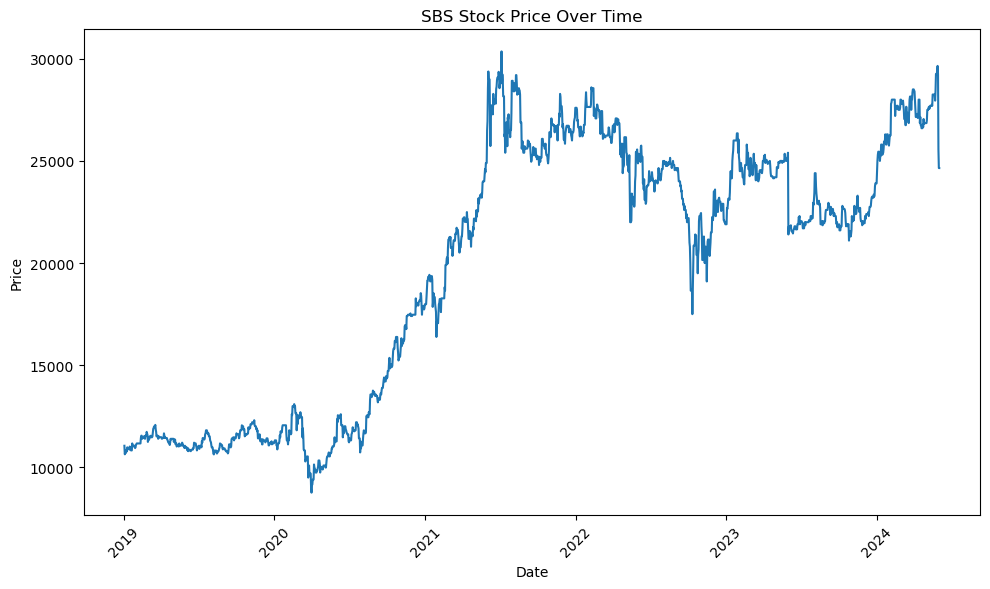

In [37]:
# Plot biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df_ACB.index, df_ACB['Price'])
plt.title('SBS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Xoay các nhãn trục x để tránh trùng lắp
plt.tight_layout()
plt.show()

Kiểm tra tính dừng của chuỗi thời gian

In [38]:
print('-----------ACB---------------')
adf_test(df_ACB['Price'])

-----------ACB---------------
Augmented Dickey-Fuller Test: 
ADF test statistic        -1.450097
p-value                    0.558038
# lags used                0.000000
# observations          1977.000000
critical value (1%)       -3.433662
critical value (5%)       -2.863003
critical value (10%)      -2.567549
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [39]:
df_ACB['Price_diff_ACB'] = diff(df_ACB['Price'], k_diff=1)
print('-----------ACB---------------')
adf_test(df_ACB['Price_diff_ACB'])

-----------ACB---------------
Augmented Dickey-Fuller Test: 
ADF test statistic       -44.913429
p-value                    0.000000
# lags used                0.000000
# observations          1976.000000
critical value (1%)       -3.433664
critical value (5%)       -2.863004
critical value (10%)      -2.567549
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [40]:
print("----------ACB----------")
multiple_models_ACB = auto_arima(df_ACB['Price'],
                             start_P=0, D=None, start_Q=0,  
                             seasonal=True, trace=True, 
                             error_action='ignore', 
                             suppress_warnings=True,
                             stepwise=True,)

----------ACB----------
Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=28582.055, Time=3.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=28581.734, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=28583.425, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=28583.441, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=28580.576, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=28584.301, Time=1.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.362 seconds


In [41]:
model_ACB = ARIMA(df_ACB['Price'], order=(0,1,0))
model_ACB_fit = model_ACB.fit()
print(model_ACB_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1978
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -14289.288
Date:                Wed, 05 Jun 2024   AIC                          28580.576
Time:                        22:54:33   BIC                          28586.165
Sample:                    01-02-2019   HQIC                         28582.630
                         - 06-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.11e+05    993.708    111.687      0.000    1.09e+05    1.13e+05
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             45938.34
Prob(Q):                              0.64   Pr

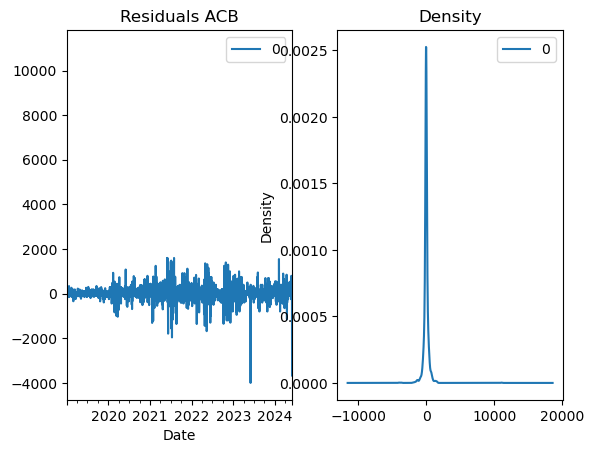

In [42]:
# Plot residual errors
residuals_ACB = pd.DataFrame(model_ACB_fit.resid)
fig, ax = plt.subplots(1,2)
residuals_ACB.plot(title="Residuals ACB", ax=ax[0])
residuals_ACB.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [43]:
print(len(df_ACB))

1978


In [44]:
# Split data 40% for testing, 60% for training
train_size_ACB = int(len(df_ACB) * 0.6)
train_ACB, test_ACB = df_ACB[:train_size_ACB], df_ACB[train_size_ACB:]
print(len(train_ACB), len(test_ACB))

1186 792


In [45]:
n_forecast_ACB = len(test_ACB)
forecast_ACB = model_ACB_fit.predict(start = len(train_ACB))

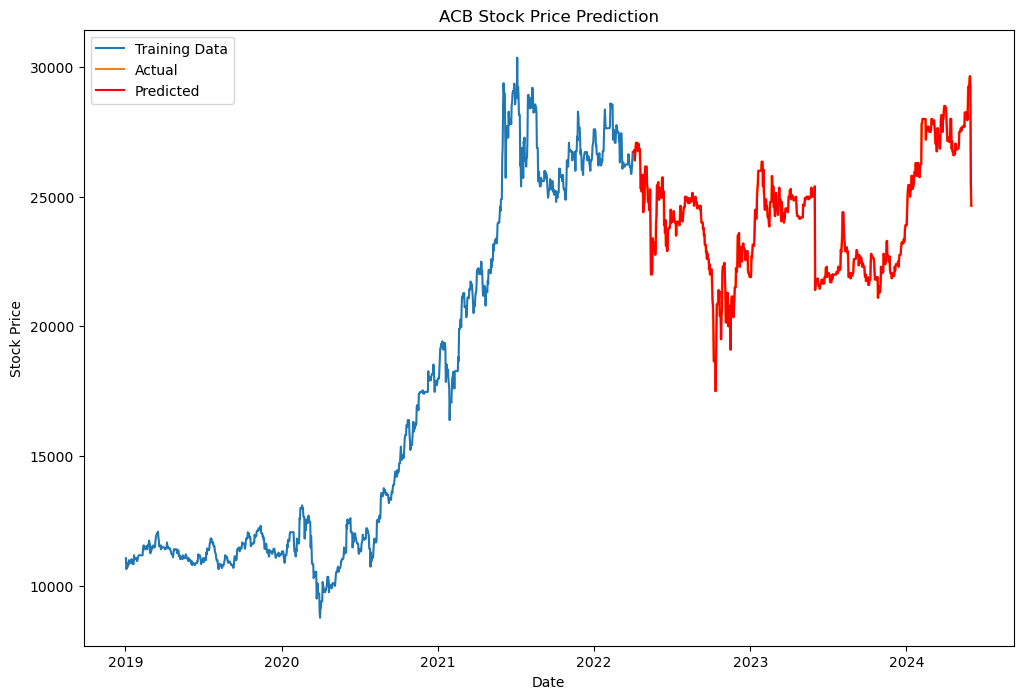

In [46]:
# Biểu đồ cho ACB
plt.figure(figsize=(12,8))  # Thay đổi kích thước của biểu đồ
plt.plot(train_ACB.index, train_ACB['Price'], label='Training Data')
plt.plot(test_ACB.index, test_ACB['Price'], label='Actual')
plt.plot(test_ACB.index, forecast_ACB, label='Predicted', color='red')  # Plot predictions for the test_ACB period
plt.title('ACB Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

Đánh giá độ chính xác của mô hình

In [47]:

# Calculate Mean Absolute Error (MAE) for ACB
print("---------------ACB---------------")
mae_ACB = mean_absolute_error(test_ACB['Price'], forecast_ACB)
print("Mean Absolute Error (MAE) for ACB:", mae_ACB)

# Calculate Mean Squared Error (MSE) for ACB
mse_ACB = mean_squared_error(test_ACB['Price'], forecast_ACB)
print("Mean Squared Error (MSE) for ACB:", mse_ACB)

# Calculate Mean Absolute Percentage Error (MAPE) for ACB
mape_ACB = mean_absolute_percentage_error(test_ACB['Price'], forecast_ACB)

print("Mean Absolute Percentage Error (MAPE) for ACB:", mape_ACB)
print("Root Mean Squared Error (RMSE) for ACB:", root_mean_squared_error(test_ACB['Price'], forecast_ACB))


---------------ACB---------------
Mean Absolute Error (MAE) for ACB: 203.5479797979798
Mean Squared Error (MSE) for ACB: 153797.4116161616
Mean Absolute Percentage Error (MAPE) for ACB: 0.8637069398876784
Root Mean Squared Error (RMSE) for ACB: 392.1701309586971


Dự đoán cho 30, 60, 90 ngày tiếp theo và vẽ biểu đồ

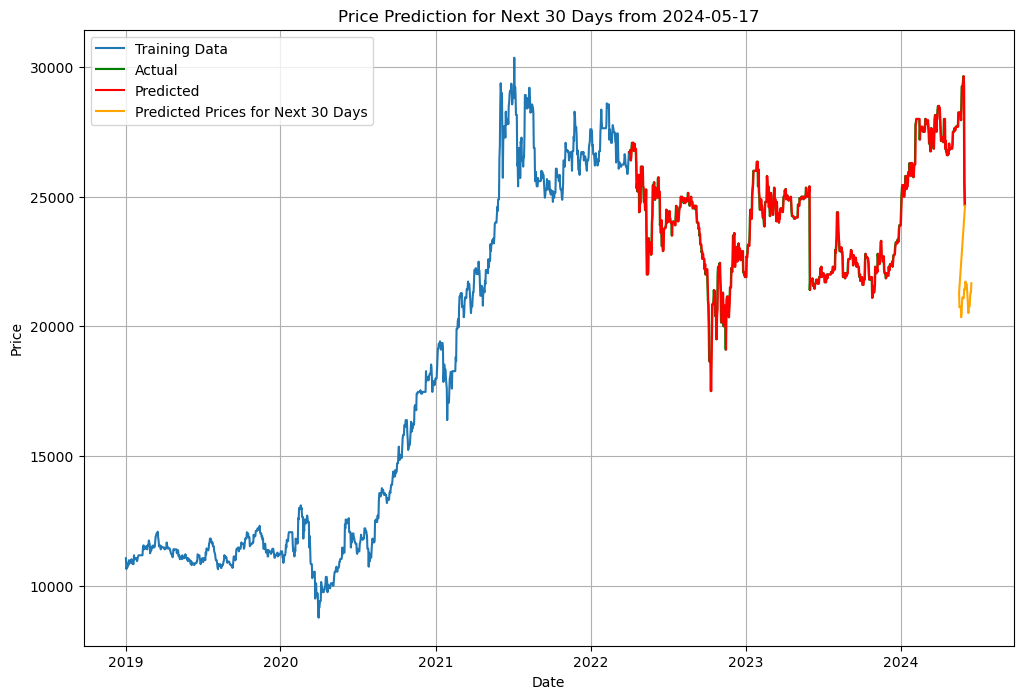

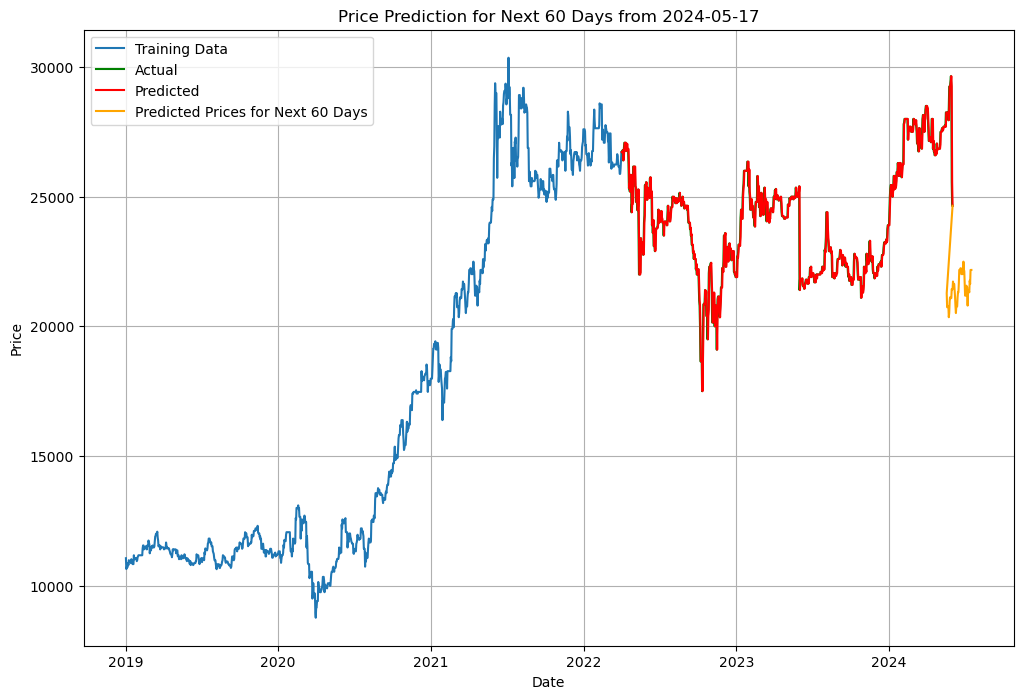

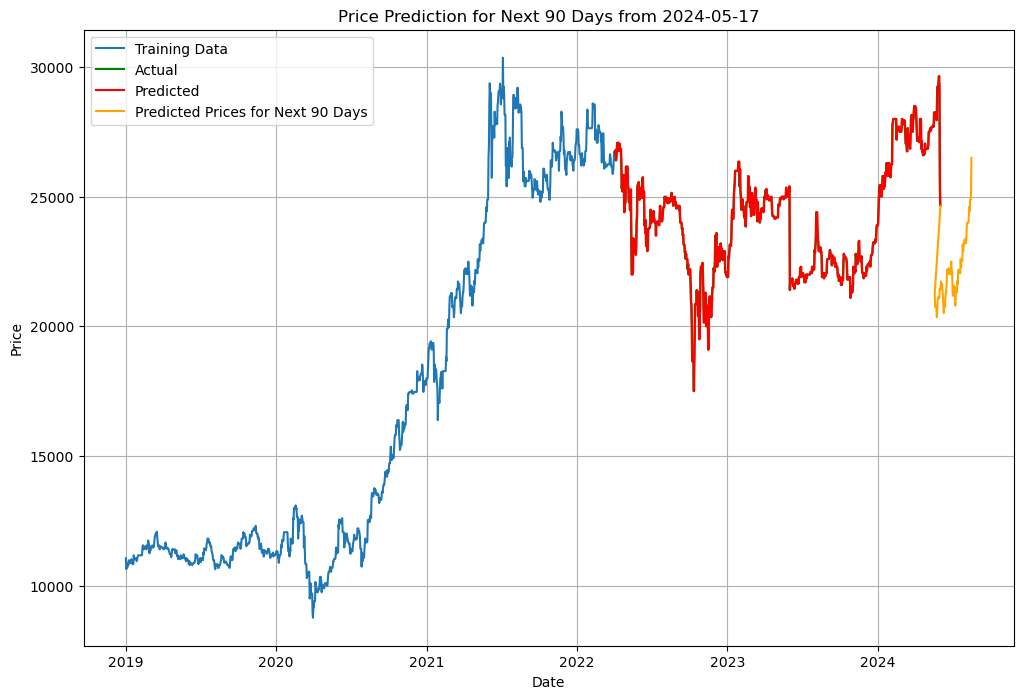

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

def forecast_and_plot(start_date, days, train_data, test_data, model_fit):
    # Tạo một mảng ngày mới cho số ngày tiếp theo kể từ start_date
    date_range = pd.date_range(start=start_date, periods=days + 1)  # Bao gồm cả ngày bắt đầu dự đoán

    # Dự đoán cho số ngày tiếp theo
    forecast = model_fit.predict(start=len(test_data), end=len(test_data) + days - 1)

    # Tạo DataFrame cho dự đoán
    forecast_df = pd.DataFrame({'Date': date_range[1:], 'Predicted': forecast.values})

# Thêm ngày cuối cùng của test_data vào ngày đầu tiên của forecast
    forecast_df = pd.concat([pd.DataFrame({'Date': [test_data.index[-1]], 'Predicted': [test_data['Price'].iloc[-1]]}), forecast_df])

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    plt.plot(train_data.index, train_data['Price'], label='Training Data')
    plt.plot(test_data.index, test_data['Price'], label='Actual', color='green')
    plt.plot(test_data.index, forecast_ACB, label='Predicted', color='red')
    plt.plot(forecast_df['Date'], forecast_df['Predicted'], label=f'Predicted Prices for Next {days} Days', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Prediction for Next {days} Days from {start_date.date()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Ví dụ với dữ liệu train_ACB, test_ACB và model_ACB_fit
forecast_and_plot(start_date, 30, train_ACB, test_ACB, model_ACB_fit)
forecast_and_plot(start_date, 60, train_ACB, test_ACB, model_ACB_fit)
forecast_and_plot(start_date, 90, train_ACB, test_ACB, model_ACB_fit)


# Chỉ plot dữ liệu tập test và predict

### Với tập dữ liệu CTS

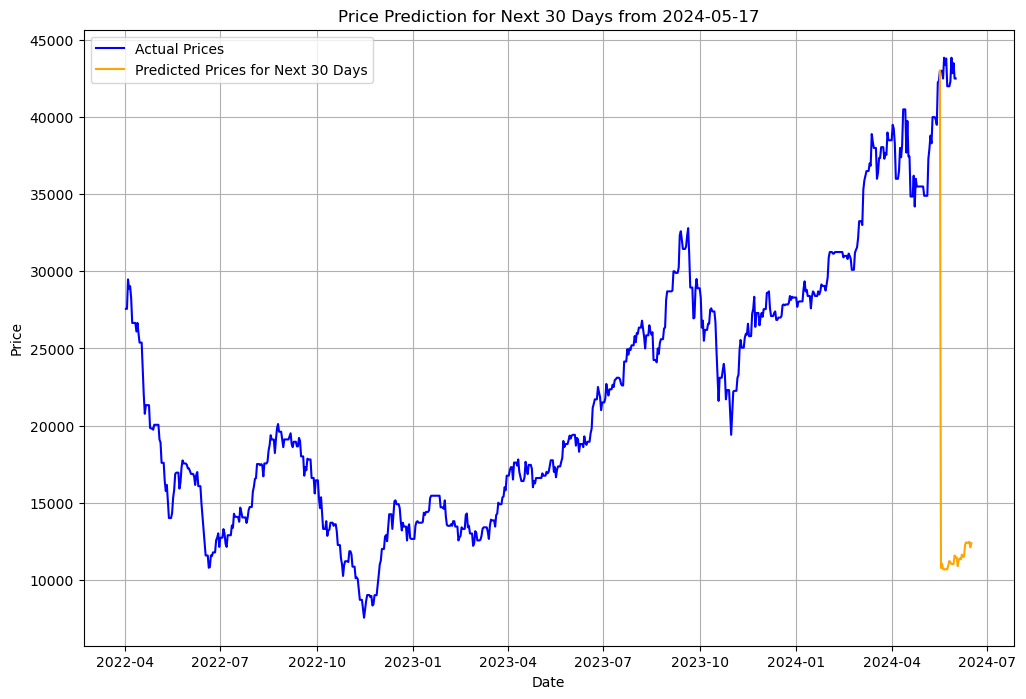

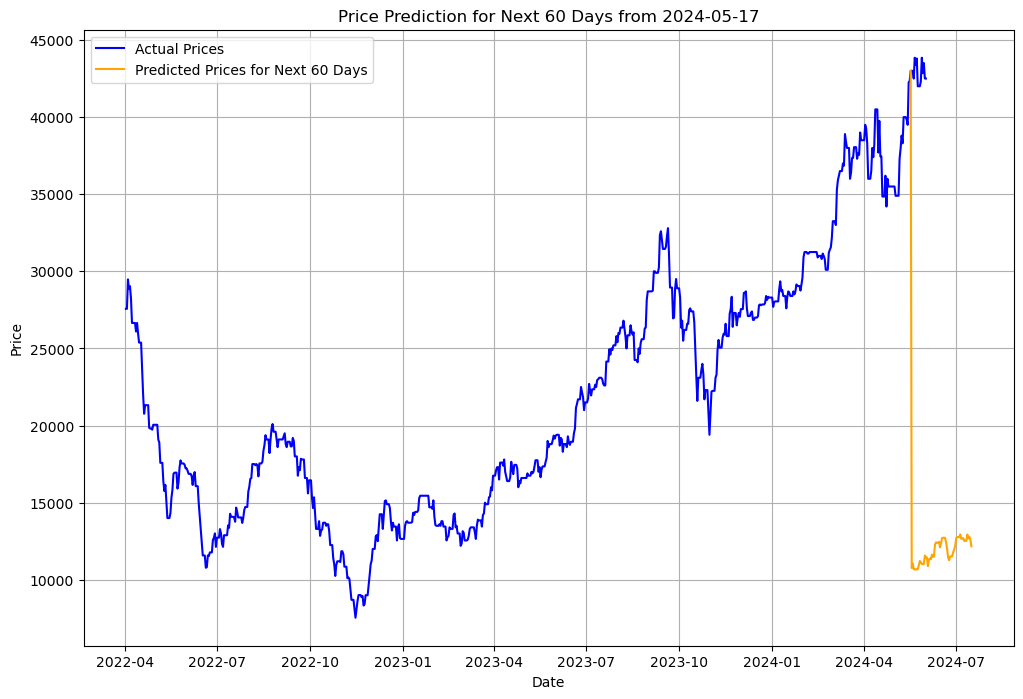

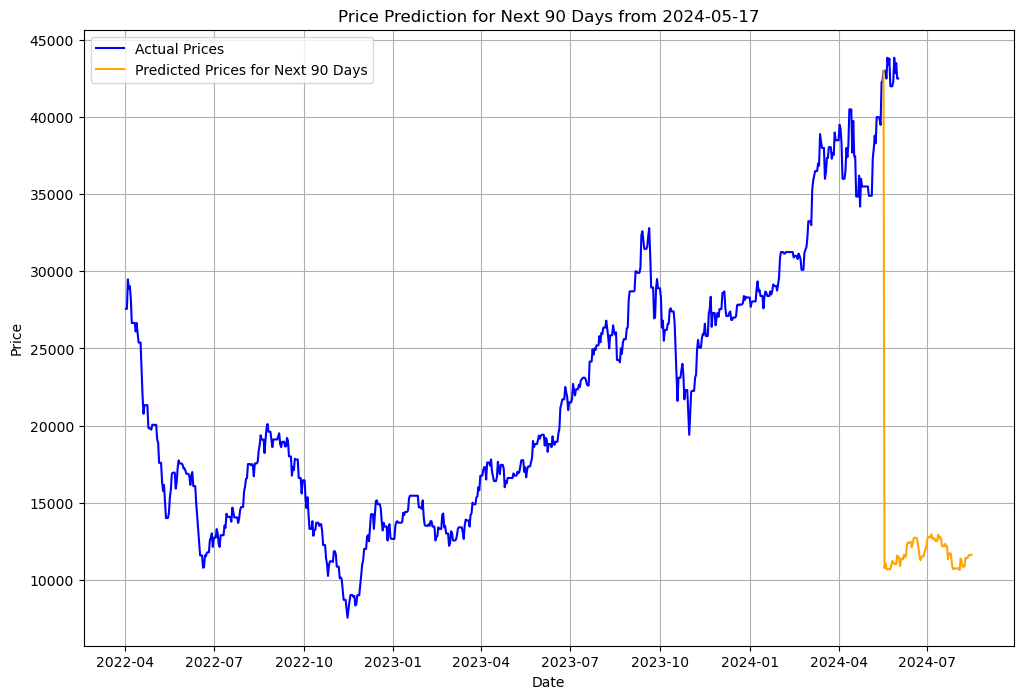

In [49]:
def forecast_and_plot(start_date, days, test_data, model_fit):
    # Lọc dữ liệu để chỉ lấy giá trị đến ngày start_date
    filtered_test_data = test_data[test_data.index <= start_date]

    # Tạo một mảng ngày mới cho số ngày tiếp theo kể từ start_date
    date_range = pd.date_range(start=start_date, periods=days + 1)  # Bao gồm cả ngày bắt đầu dự đoán

    # Dự đoán cho số ngày tiếp theo
    forecast = model_fit.predict(start=len(filtered_test_data), end=len(filtered_test_data) + days - 1)

    # Tạo DataFrame cho dự đoán
    forecast_df = pd.DataFrame({'Date': date_range[1:], 'Predicted': forecast.values})

    # Thêm ngày cuối cùng của filtered_test_data vào ngày đầu tiên của forecast
    last_actual_price = filtered_test_data['Price'].iloc[-1]
    last_actual_date = filtered_test_data.index[-1]
    forecast_df = pd.concat([pd.DataFrame({'Date': [last_actual_date], 'Predicted': [last_actual_price]}), forecast_df], ignore_index=True)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    plt.plot(test_data.index, test_data['Price'], label='Actual Prices', color='blue')
    plt.plot(forecast_df['Date'], forecast_df['Predicted'], label=f'Predicted Prices for Next {days} Days', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Prediction for Next {days} Days from {start_date.date()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Ví dụ với dữ liệu test_CTS và model_CTS_fit
forecast_and_plot(start_date, 30, test_CTS, model_CTS_fit)
forecast_and_plot(start_date, 60, test_CTS, model_CTS_fit)
forecast_and_plot(start_date, 90, test_CTS, model_CTS_fit)


### Với tập dữ liệu SBS

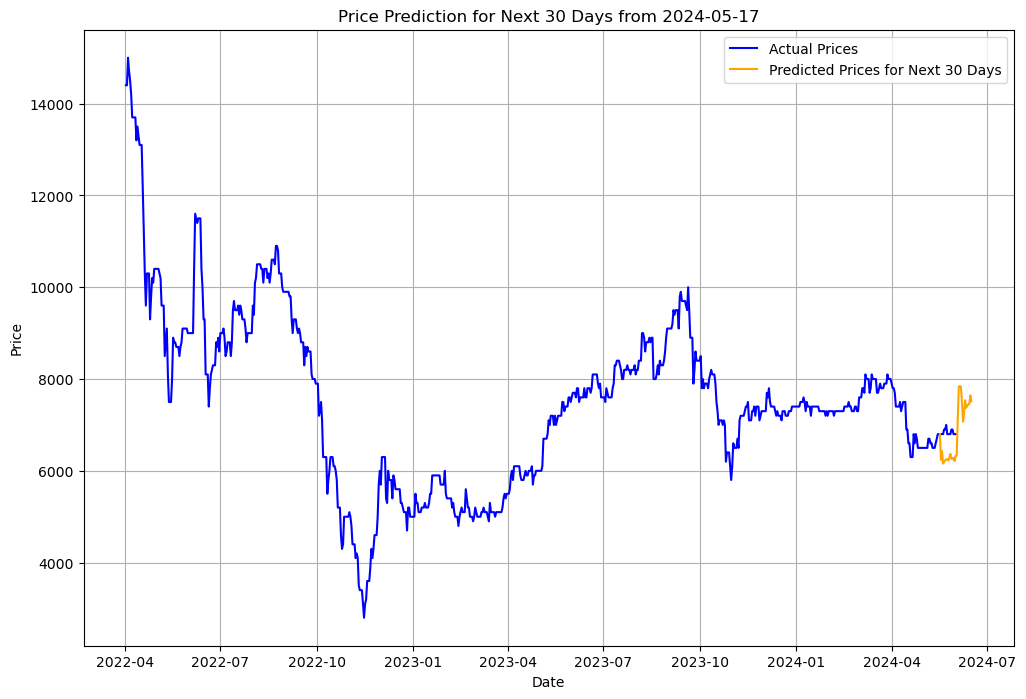

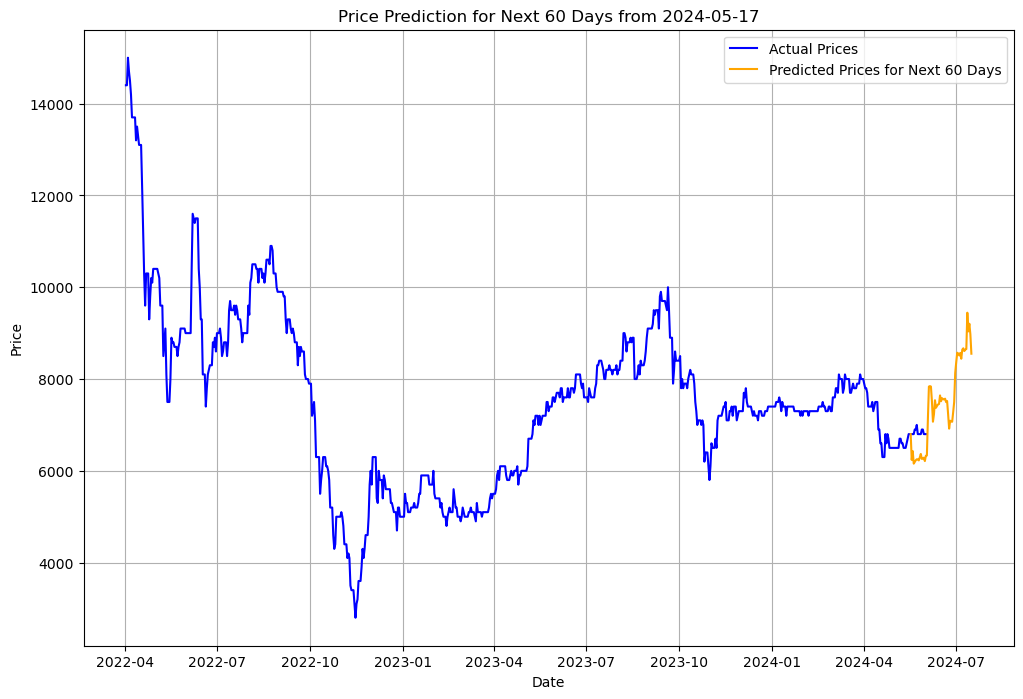

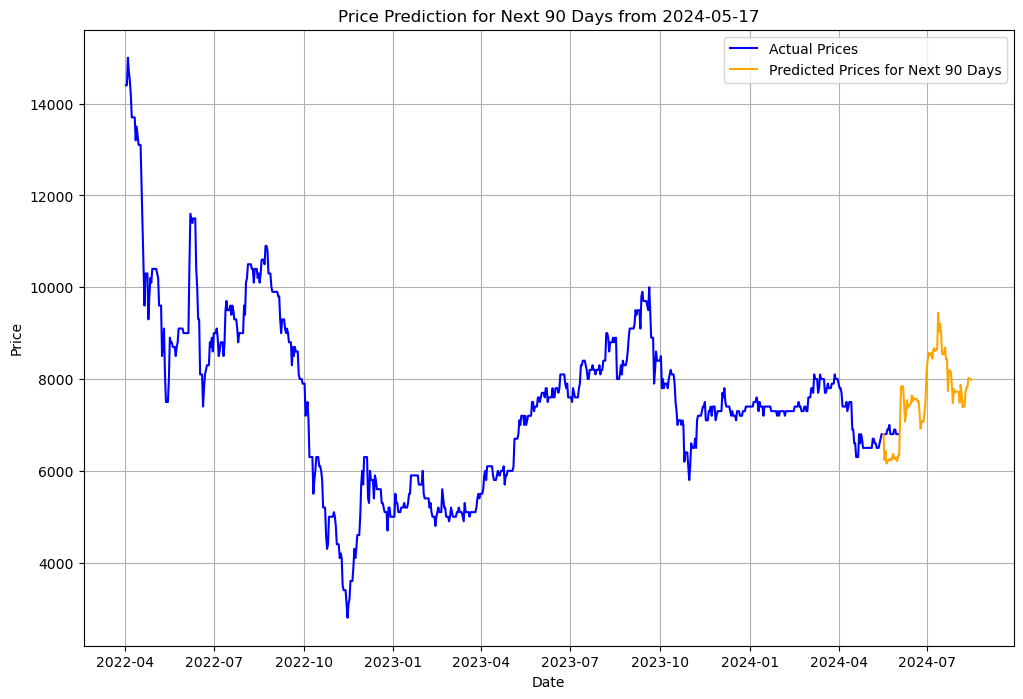

In [50]:
def forecast_and_plot(start_date, days, test_data, model_fit):
    # Lọc dữ liệu để chỉ lấy giá trị đến ngày start_date
    filtered_test_data = test_data[test_data.index <= start_date]

    # Tạo một mảng ngày mới cho số ngày tiếp theo kể từ start_date
    date_range = pd.date_range(start=start_date, periods=days + 1)  # Bao gồm cả ngày bắt đầu dự đoán

    # Dự đoán cho số ngày tiếp theo
    forecast = model_fit.predict(start=len(filtered_test_data), end=len(filtered_test_data) + days - 1)

    # Tạo DataFrame cho dự đoán
    forecast_df = pd.DataFrame({'Date': date_range[1:], 'Predicted': forecast.values})

    # Thêm ngày cuối cùng của filtered_test_data vào ngày đầu tiên của forecast
    last_actual_price = filtered_test_data['Price'].iloc[-1]
    last_actual_date = filtered_test_data.index[-1]
    forecast_df = pd.concat([pd.DataFrame({'Date': [last_actual_date], 'Predicted': [last_actual_price]}), forecast_df], ignore_index=True)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    plt.plot(test_data.index, test_data['Price'], label='Actual Prices', color='blue')
    plt.plot(forecast_df['Date'], forecast_df['Predicted'], label=f'Predicted Prices for Next {days} Days', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Prediction for Next {days} Days from {start_date.date()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Ví dụ với dữ liệu test_SBS và model_SBS_fit
forecast_and_plot(start_date, 30, test_SBS, model_SBS_fit)
forecast_and_plot(start_date, 60, test_SBS, model_SBS_fit)
forecast_and_plot(start_date, 90, test_SBS, model_SBS_fit)


### Với tập dữ liệu ACB

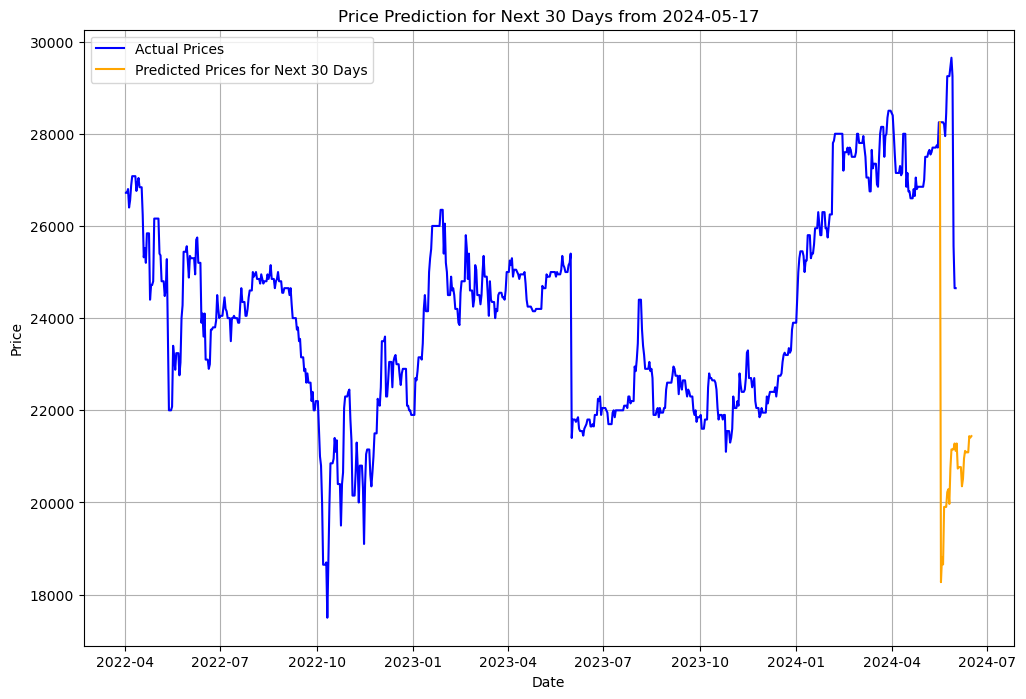

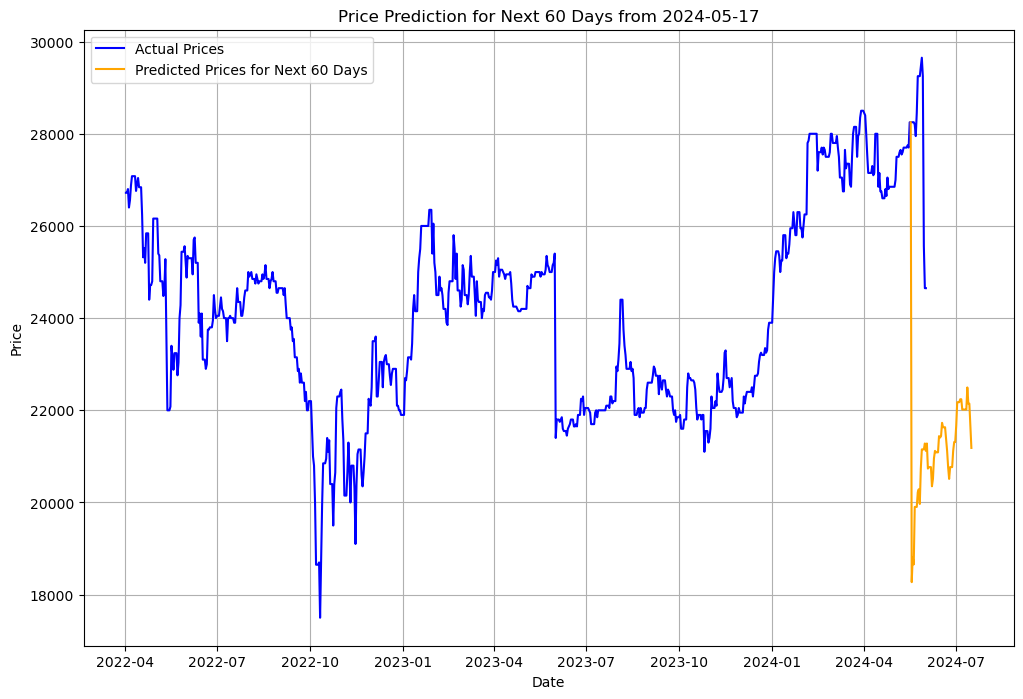

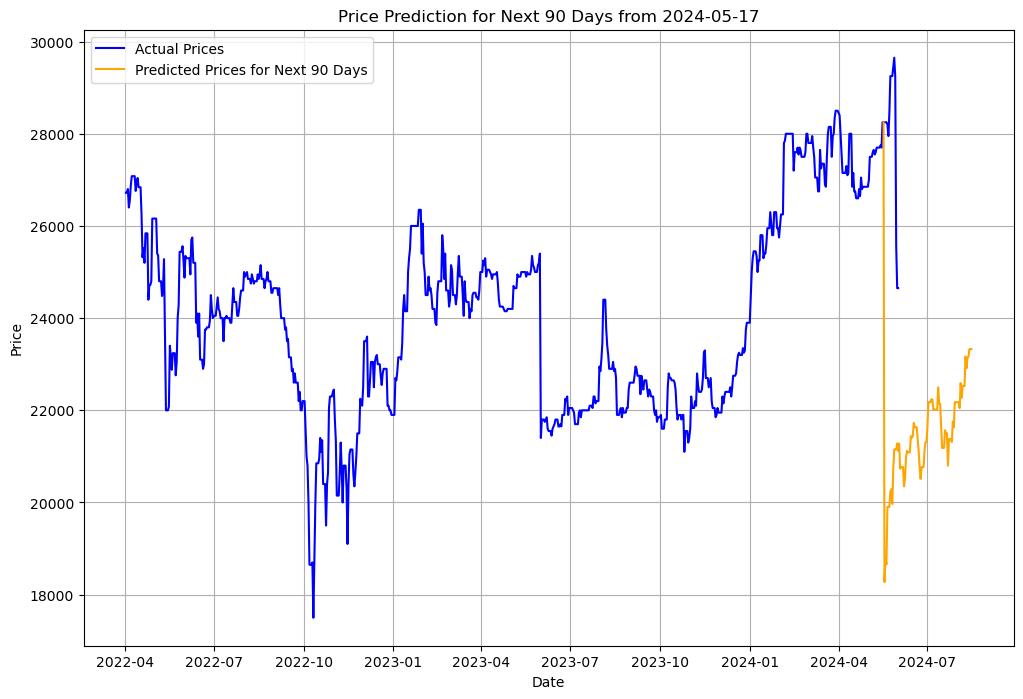

In [51]:
def forecast_and_plot(start_date, days, test_data, model_fit):
    # Lọc dữ liệu để chỉ lấy giá trị đến ngày start_date
    filtered_test_data = test_data[test_data.index <= start_date]

    # Tạo một mảng ngày mới cho số ngày tiếp theo kể từ start_date
    date_range = pd.date_range(start=start_date, periods=days + 1)  # Bao gồm cả ngày bắt đầu dự đoán

    # Dự đoán cho số ngày tiếp theo
    forecast = model_fit.predict(start=len(filtered_test_data), end=len(filtered_test_data) + days - 1)

    # Tạo DataFrame cho dự đoán
    forecast_df = pd.DataFrame({'Date': date_range[1:], 'Predicted': forecast.values})

    # Thêm ngày cuối cùng của filtered_test_data vào ngày đầu tiên của forecast
    last_actual_price = filtered_test_data['Price'].iloc[-1]
    last_actual_date = filtered_test_data.index[-1]
    forecast_df = pd.concat([pd.DataFrame({'Date': [last_actual_date], 'Predicted': [last_actual_price]}), forecast_df], ignore_index=True)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    plt.plot(test_data.index, test_data['Price'], label='Actual Prices', color='blue')
    plt.plot(forecast_df['Date'], forecast_df['Predicted'], label=f'Predicted Prices for Next {days} Days', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Prediction for Next {days} Days from {start_date.date()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Đặt ngày bắt đầu dự đoán
start_date = pd.Timestamp('2024-05-17')

# Ví dụ với dữ liệu test_ACB và model_ACB_fit
forecast_and_plot(start_date, 30, test_ACB, model_ACB_fit)
forecast_and_plot(start_date, 60, test_ACB, model_ACB_fit)
forecast_and_plot(start_date, 90, test_ACB, model_ACB_fit)
